# Bibliotecas

In [1]:
import pandas as pd 
import numpy as np
import os
import plotly.express as px
from itertools import combinations 
from collections import Counter 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette='Set2')
sns.despine()

<Figure size 432x288 with 0 Axes>

# Tratamento do Dataframe

O Dataframe estava dividido em 12 tabelas, uma para cada mês do ano de 2019. Concatendo elas em um único arquivo:

In [3]:
arquivos = [arquivo for arquivo in os.listdir('./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

In [4]:
vendas = pd.DataFrame()

for arquivo in arquivos:
    df = pd.read_csv('./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+arquivo)
    vendas = pd.concat([vendas, df])

vendas.to_csv('vendas.csv', index=False)

In [5]:
df_vendas = pd.read_csv('vendas.csv')

In [6]:
df_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Limpeza de Dados

In [7]:
df_vendas.isnull().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [8]:
df_vendas.dropna(inplace=True)

In [9]:
df_vendas.isnull().any().any()

False

In [10]:
temporario = df_vendas[df_vendas['Order Date'].str[0:2] == 'Or']
temporario.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
df_vendas = df_vendas[df_vendas['Order Date'].str[0:2] != 'Or']

Inserindo coluna de mês para análise mensal:

In [12]:
df_vendas['Month'] = df_vendas['Order Date'].str[0:2]
df_vendas['Month'] = df_vendas['Month'].astype('int32')
df_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [13]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [14]:
df_vendas['Quantity Ordered'] = pd.to_numeric(df_vendas['Quantity Ordered'])
df_vendas['Price Each'] = pd.to_numeric(df_vendas['Price Each'])

In [15]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


Criando uma coluna de 'Sales' que é a quantidade de produtos vendidos multiplicada pelo preço unitário:

In [16]:
df_vendas['Sales'] = df_vendas['Quantity Ordered'] * df_vendas['Price Each']
df_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Qual foi o melhor mês de vendas? Quanto foi ganho no mês?

In [17]:
melhor_mes = df_vendas.groupby('Month').sum()
melhor_mes

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


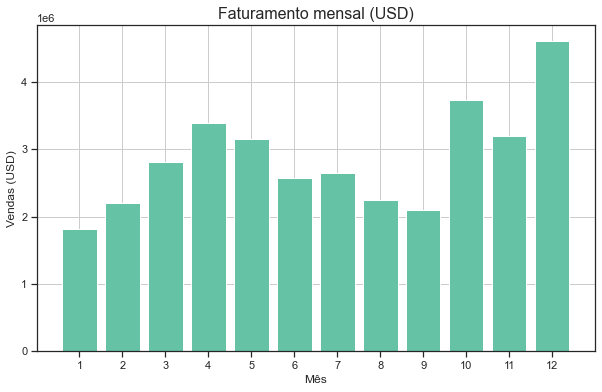

In [18]:
meses = range(1, 13)

plt.subplots(figsize=(10, 6))

plt.bar(meses, melhor_mes['Sales'])
    
plt.xticks(meses)
plt.xlabel('Mês')
plt.ylabel('Vendas (USD)')
plt.title('Faturamento mensal (USD)', fontsize = 16)
plt.grid(True)
plt.show()

# Qual cidade teve o maior número de vendas?

Adicionando uma coluna de cidade:

In [19]:
def obter_cidade(address):
    return address.split(',')[1]

def obter_estado(address):
    return address.split(' ')[2].split(',')[0]

In [20]:
df_vendas['City'] = df_vendas['Purchase Address'].apply(lambda x: f'{obter_cidade(x)} ({obter_estado(x)})')

df_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (St)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (St)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (St)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (St)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (St)


In [21]:
cidade_maior_venda = df_vendas.groupby('City').sum()

In [22]:
cidade_maior_venda.sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (St),50239,8.211462e+06,315520,8.262204e+06
Los Angeles (St),33289,5.421435e+06,208325,5.452571e+06
New York City (St),27932,4.635371e+06,175741,4.664317e+06
Boston (St),22528,3.637410e+06,141112,3.661642e+06
Atlanta (St),16602,2.779908e+06,104794,2.795499e+06
Dallas (St),16730,2.752628e+06,104620,2.767975e+06
Seattle (St),16553,2.733296e+06,104941,2.747755e+06
Portland (St),14053,2.307747e+06,87765,2.320491e+06
Austin (St),11153,1.809874e+06,69829,1.819582e+06


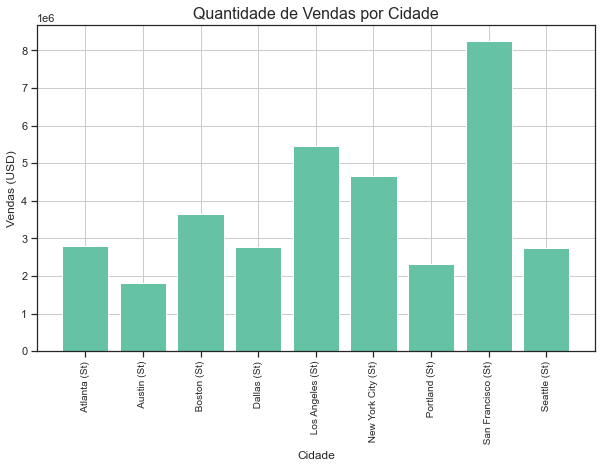

In [23]:
cidades = [cidade for cidade, df in df_vendas.groupby('City')]

plt.subplots(figsize=(10, 6))

plt.bar(cidades, cidade_maior_venda['Sales'])
plt.xticks(cidades, rotation='vertical', size=10)
plt.ylabel('Vendas (USD)')
plt.xlabel('Cidade')
plt.title('Quantidade de Vendas por Cidade', fontsize = 16)
plt.grid(True)
plt.show()

In [24]:
df_vendas['Order Date'] = pd.to_datetime(df_vendas['Order Date'])

df_vendas['Hour'] = df_vendas['Order Date'].dt.hour
df_vendas['Minute'] = df_vendas['Order Date'].dt.minute

In [25]:
df_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (St),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (St),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (St),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (St),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (St),9,27


In [26]:
horas = [hora for hora, df in df_vendas.groupby('Hour')]

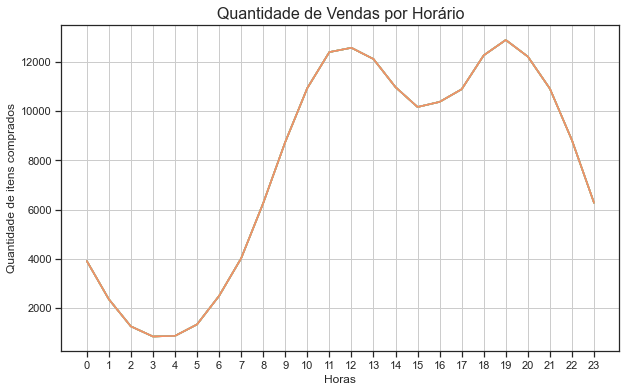

In [27]:
plt.subplots(figsize=(10, 6))

plt.plot(horas, df_vendas.groupby(['Hour']).count())
plt.xticks(horas)
plt.xlabel('Horas')
plt.ylabel('Quantidade de itens comprados')
plt.title('Quantidade de Vendas por Horário', fontsize = 16)
plt.grid(True)
plt.show()

# Quais produtos frequentemente são vendidos juntos?

In [28]:
cesta_produtos = df_vendas[df_vendas['Order ID'].duplicated(keep=False)]

In [29]:
cesta_produtos.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (St),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (St),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (St),19,42


In [30]:
combinacoes = cesta_produtos.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

In [31]:
combinacoes

3                            Google Phone, Wired Headphones
4                            Google Phone, Wired Headphones
18                       Google Phone, USB-C Charging Cable
19                       Google Phone, USB-C Charging Cable
30        Bose SoundSport Headphones, Bose SoundSport He...
                                ...                        
186792        34in Ultrawide Monitor, AA Batteries (4-pack)
186803             Wired Headphones, AAA Batteries (4-pack)
186804             Wired Headphones, AAA Batteries (4-pack)
186841                   Google Phone, USB-C Charging Cable
186842                   Google Phone, USB-C Charging Cable
Name: Product, Length: 14649, dtype: object

In [32]:
cesta_produtos['Combinations'] = combinacoes

<ipython-input-32-d8a07ea66560>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cesta_produtos['Combinations'] = combinacoes


In [33]:
cesta_produtos.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Combinations
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (St),14,38,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (St),14,38,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (St),19,42,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (St),19,42,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (St),11,31,"Bose SoundSport Headphones, Bose SoundSport He..."


In [34]:
cesta_produtos = cesta_produtos[['Order ID', 'Combinations']].drop_duplicates()

In [35]:
count = Counter()

for row in cesta_produtos['Combinations']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Qual o produto mais vendido?

In [36]:
pedidos = df_vendas.groupby('Product')
quantidade_comprada = pedidos.sum()['Quantity Ordered']

In [37]:
produtos = [produto for produto, df in pedidos]

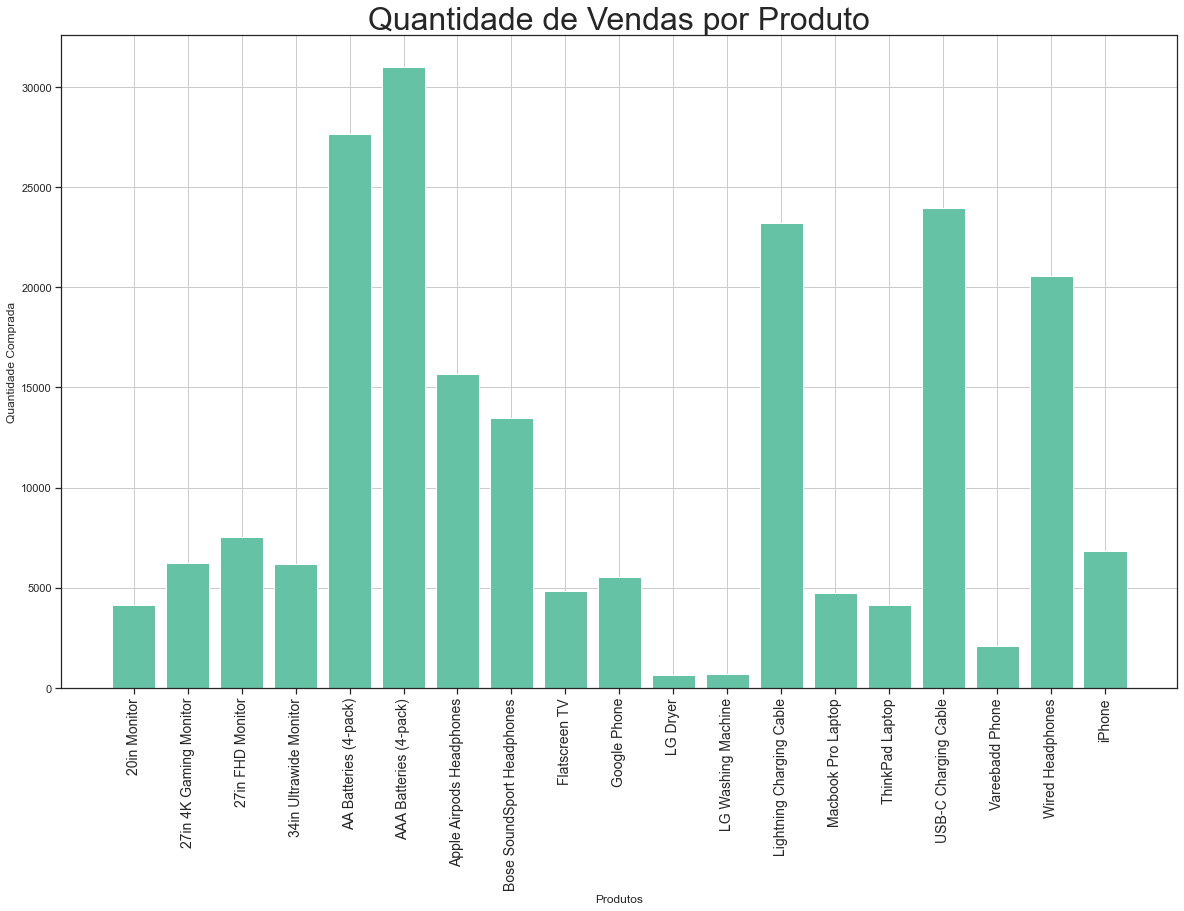

In [38]:
plt.subplots(figsize=(20, 12))

plt.bar(produtos, quantidade_comprada)
plt.xticks(produtos, rotation='vertical', size=14)
plt.xlabel('Produtos')
plt.ylabel('Quantidade Comprada')
plt.title('Quantidade de Vendas por Produto', fontsize = 32)
plt.grid(True)
plt.show()

In [39]:
preços = df_vendas.groupby('Product').mean()['Price Each']

In [40]:
preços

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-41-41c083e6022c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(produtos, rotation='vertical', size=14)


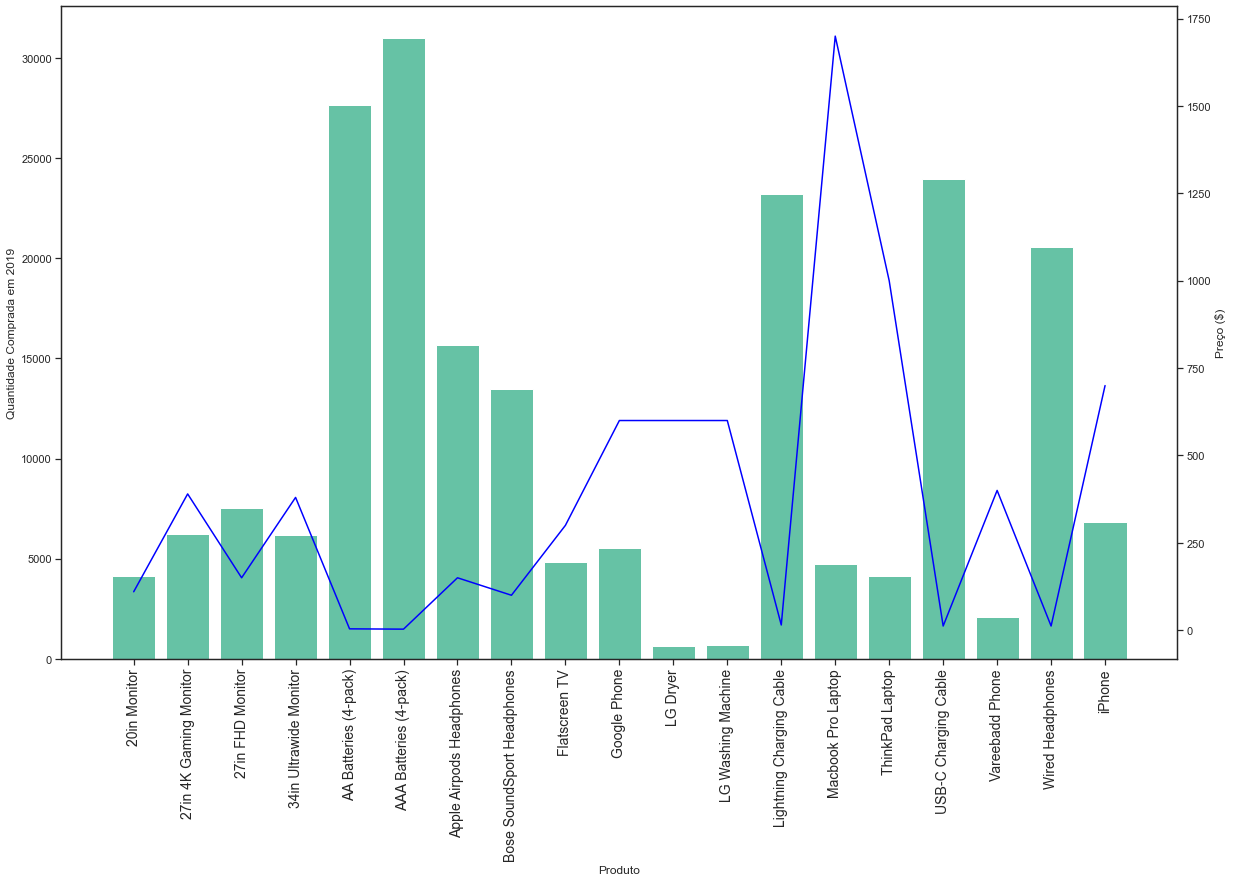

In [41]:
fig, ax1 = plt.subplots(figsize=(20, 12))

ax2 = ax1.twinx()
ax1.bar(produtos, quantidade_comprada)
ax2.plot(produtos, preços, 'b-')

ax1.set_xlabel('Produto')
ax1.set_ylabel('Quantidade Comprada em 2019')
ax2.set_ylabel('Preço ($)')
ax1.set_xticklabels(produtos, rotation='vertical', size=14)

plt.show()